In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.makedirs('reference', exist_ok=True)

In [3]:
df = pd.read_csv('input/raw/WDICSV.csv', usecols=['Indicator Code', 'Indicator Name']).drop_duplicates()

In [ ]:
# keywords for categorization
categories = {
    'Economic': [
        'GDP', 'GNI', 'income', 'economy', 'economic', 'market', 'trade', 'export', 'import', 'revenue', 
        'debt', 'financial', 'inflation', 'fiscal', 'monetary', 'investment', 'capital', 'savings', 'budget', 
        'domestic credit', 'expenditure', 'consumption', 'PPP', 'purchasing power', 'bank', 'financing', 
        'stocks', 'bonds', 'deflator', 'interest rate', 'tax', 'tariff', 'business', 'commercial', 
        'merchandise', 'stock market', 'exchange rate', 'exchange value', 'GDP deflator', 'price index', 
        'consumer price', 'wholesale price', 'compensation of employees', 'reserves', 'equity indices',
        'equity index', 'liquid reserves', 'capital to assets', 'S&P Global', 'broad money', 'expense', 
        'firms', 'gross value', 'listed domestic companies', 'IMF', 'foreign assets', 'customs', 'WTO', 
        'export goods', 'import goods', 'trading', 'bilateral trade', 'commerce', 'duty', 'trade balance', 
        'trade deficit', 'trade surplus', 'products', 'manufactured products', 'bound rate', 
        'container port', 'liner shipping', 'changes in inventories', 'PPG, IBRD', 'PPG, IDA', 
        'External balance on goods and services', 'ODA', 'liabilities', 'Net incurrence of liabilities', 
        'IFC, private nonguaranteed'
    ],
    'Poverty': [
        'poverty', 'poor', 'GINI', 'inequality', 'welfare', 'subsistence', 'quintile', 'bottom 40%', 
        'multidimensional', 'protection', 'vulnerable', 'deprived', 'basic needs', 'safety net', 
        'social insurance', 'social assistance', 'social protection'
    ],
    'Healthcare': [
        'health', 'mortality', 'life expectancy', 'disease', 'immunization', 'hospital', 'medical', 'physician',
        'nurse', 'death', 'medication', 'therapy', 'malaria', 'HIV', 'tuberculosis', 'surgery', 'NCDs', 'birth',
        'pregnancy', 'maternal', 'infant', 'cancer', 'diabetes', 'hygiene', 'sanitation', 'nutrition', 'AIDS', 
        'healthcare', 'pandemic', 'epidemic', 'vaccination', 'doctor', 'antiretroviral', 'diarrhea', 
        'oral rehydration', 'tetanus', 'overweight', 'wasting'
    ],
    'Education': [
        'education', 'school', 'literacy', 'enrollment', 'student', 'teacher', 'tertiary', 'primary', 
        'secondary', 'pupil', 'learning', 'educational', 'bachelor', 'grade', 'completion', 'attainment', 
        'reading', 'compulsory', 'academic'
    ],
    'Climate': [
        'CO2', 'emission', 'climate', 'environment', 'renewable', 'pollution', 'forest', 'energy', 
        'carbon dioxide', 'methane', 'nitrous oxide', 'air pollution', 'PM2.5', 'fossil fuel', 
        'clean energy', 'greenhouse gas', 'sustainability', 'deforestation', 'hydroelectric', 
        'sustainable', 'ecology'
    ],
    'Agriculture': [
        'agriculture', 'land', 'rural', 'crop', 'farm', 'food', 'livestock', 'arable', 'forestry', 
        'fishing', 'irrigation', 'cereal', 'fertilizer', 'agricultural', 'cropland', 'yield', 
        'aquaculture', 'harvest', 'cattle', 'fisheries', 'fish', 'fishery'
    ],
    'Infrastructure': [
        'urban', 'electricity', 'water', 'sanitation', 'internet', 'ICT', 'road', 'transport', 
        'telecommunication', 'mobile', 'broadband', 'logistics', 'shipping', 'air transport', 
        'rail', 'utility', 'power', 'sewage', 'construction', 'drinking water'
    ],
    'Demographics': [
        'population', 'birth', 'death', 'fertility', 'migration', 'age', 'gender', 'sex ratio', 
        'life expectancy', 'demographic', 'youth', 'elderly', 'aging', 'census', 'mortality', 
        'longevity', 'dependency ratio', 'household', 'International migrant stock'
    ],
    'Labor': [
        'employment', 'unemployment', 'labor', 'workforce', 'job', 'wage', 'earning', 'working hours', 
        'part-time', 'full-time', 'workers', 'labor force', 'occupation', 'employed', 'self-employed', 
        'child labor', 'working age', 'inactive', 'participation rate'
    ],
    'Gender': [
        'gender', 'women', 'female', 'girls', 'gender equality', 'gender parity', 'maternal', 'maternity', 
        'female labor', 'female education', 'female enrollment', 'women in parliament', 'female ownership', 
        'female manager', 'female business'
    ],
    'Military': [
        'military', 'arms', 'weapon', 'defense', 'armed forces', 'security', 'conflict', 'war', 
        'battle', 'army', 'navy', 'terror', 'violence'
    ],
    'Governance': [
        'governance', 'government', 'corruption', 'transparency', 'accountability', 'regulation', 'policy', 
        'institution', 'political', 'stability', 'rule of law', 'legal', 'justice', 'rights', 'CPIA', 
        'public administration', 'bureaucracy', 'regulatory'
    ],
    'Technology': [
        'technology', 'innovation', 'R&D', 'research', 'patent', 'high-tech', 'ICT', 'digital', 
        'internet', 'computer', 'mobile', 'broadband', 'telecommunications', 'tech'
    ],
    'Financial Services': [
        'banking', 'ATM', 'loans', 'credit', 'insurance', 'microfinance', 'deposit', 'borrower', 'lender',
        'remittance', 'financial institution', 'financial inclusion', 'borrowing', 'lending', 'depositor',
        'automated teller', 'nonperforming loans', 'bank capital', 'bank assets', 'interest payments', 'BoP',
        'official aid received', 'subsidies', 'Net official development assistance', 'services, value added'
    ],
    'Law & Justice': [
        'law enforcement', 'justice', 'legal system', 'courts', 'crime', 'judicial', 'prosecution',
        'property rights', 'legal rights', 'judiciary', 'homicide', 'prison', 'criminal', 'bribery', 
        'theft', 'vandalism', 'corruption', 'formal courts', 'informal courts', 'resolution of disputes'
    ],
    'Tourism & Travel': [
        'tourism', 'tourist', 'travel', 'visitor', 'arrival', 'departure', 'hotel', 'accommodation',
        'leisure', 'vacation', 'hospitality'
    ],
    'Natural Resources': [
        'fishery', 'mining', 'mineral', 'resource', 'extraction', 'natural resource', 'water resource',
        'groundwater', 'freshwater', 'marine', 'ocean', 'biodiversity', 'species', 'wildlife', 
        'threatened species', 'bird species', 'plant species', 'mammal species', 'fish species'
    ],
    'Manufacturing': [
        'manufacturing', 'manufactured', 'industrial production', 'industry value added', 'factories',
        'chemical', 'machinery', 'electronics', 'textiles', 'metal products', 'value added in manufacturing',
        'medium and high-tech', 'manufacturing value', 'industrial design'
    ]
}

# Function to categorize indicators


def categorize_indicator(indicator_text):
    indicator_text = indicator_text.lower()
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in indicator_text:
                return category
    return 'Other'


# Apply categorization
df['Category'] = df['Indicator Name'].apply(categorize_indicator)

# Display category counts
category_counts = df['Category'].value_counts()
print("Indicator categories:")
print(category_counts)

Indicator categories:
Category
Economic              617
Demographics          200
Education             162
Healthcare            109
Climate                64
Infrastructure         61
Agriculture            52
Other                  47
Poverty                37
Governance             37
Financial Services     30
Labor                  29
Gender                 13
Manufacturing          10
Military                9
Technology              8
Natural Resources       5
Tourism & Travel        4
Law & Justice           2
Name: count, dtype: int64


In [ ]:
# look at the distribution of indicators in each category
print(f"Total indicators: {len(df)}")
print(f"Categorized indicators: {len(df) - category_counts.get('Other', 0)}")
print(f"Uncategorized (Other) indicators: {category_counts.get('Other', 0)}")
print(f"Percentage categorized: {(len(df) - category_counts.get('Other', 0))/len(df)*100:.2f}%")

Total indicators: 1496
Categorized indicators: 1449
Uncategorized (Other) indicators: 47
Percentage categorized: 96.86%


In [ ]:
# look at other indicators
# exclude net bilateral aid flows because we're dropping those in the modeling later
other_indicators = df[df['Category'] == 'Other']
other_indicators = other_indicators[~other_indicators['Indicator Name'].str.contains('Net bilateral aid flows')]
pd.set_option('display.max_colwidth', None)
other_indicators[['Indicator Name', 'Indicator Code']]

,Indicator Name,Indicator Code
299,DEC alternative conversion factor (LCU per US$),PA.NUS.ATLS
307,Disaster risk reduction progress score (1-5 scale; 5=best),EN.CLC.DRSK.XQ
386,Exclusive breastfeeding (% of children under 6 months),SH.STA.BFED.ZS
450,Fixed telephone subscriptions,IT.MLT.MAIN
451,Fixed telephone subscriptions (per 100 people),IT.MLT.MAIN.P2
648,"Internally displaced persons, new displacement associated with disasters (number of cases)",VC.IDP.NWDS
1118,Prevalence of current tobacco use (% of adults),SH.PRV.SMOK
1120,"Prevalence of current tobacco use, males (% of male adults)",SH.PRV.SMOK.MA
1164,Procedures to register property (number),IC.PRP.PROC
1183,"Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)",SG.TIM.UWRK.MA


In [7]:
# Analyze the effectiveness of our improved categorization
new_category_counts = df['Category'].value_counts()

# Calculate improvement metrics
print("Category distribution:")
print(new_category_counts)

# Count of indicators in new and expanded categories
expanded_categories = ['Economic', 'Financial Services', 'Manufacturing', 'Healthcare', 'Agriculture']
expanded_count = df[df['Category'].isin(expanded_categories)].shape[0]

print(f"\nIndicators in expanded categories: {expanded_count}")
print(f"Remaining indicators in 'Other' category: {category_counts.get('Other', 0)}")

Category distribution:
Category
Economic              617
Demographics          200
Education             162
Healthcare            109
Climate                64
Infrastructure         61
Agriculture            52
Other                  47
Poverty                37
Governance             37
Financial Services     30
Labor                  29
Gender                 13
Manufacturing          10
Military                9
Technology              8
Natural Resources       5
Tourism & Travel        4
Law & Justice           2
Name: count, dtype: int64

Indicators in expanded categories: 818
Remaining indicators in 'Other' category: 47


In [8]:
# Analyze potential crossover in categories
def find_potential_categories(indicator_text):
    indicator_text = indicator_text.lower()
    matching_categories = []
    
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in indicator_text:
                matching_categories.append(category)
                break
    
    return matching_categories

# Add a new column showing all potential categories
df['Potential_Categories'] = df['Indicator Name'].apply(find_potential_categories)

# Find indicators with multiple potential categories
crossover_indicators = df[df['Potential_Categories'].apply(len) > 1]
print(f"Indicators with potential category crossover: {len(crossover_indicators)}")
print(f"Percentage of indicators with crossover: {len(crossover_indicators)/len(df)*100:.2f}%\n")

# Display the top 10 crossover examples
if len(crossover_indicators) > 0:
    print("Examples of indicators with category crossover:")
    display(crossover_indicators[['Indicator Name', 'Category', 'Potential_Categories']].head(10))

Indicators with potential category crossover: 772
Percentage of indicators with crossover: 51.60%

Examples of indicators with category crossover:


,Indicator Name,Category,Potential_Categories
0,Access to clean fuels and technologies for cooking (% of population),Demographics,"[Demographics, Technology]"
1,"Access to clean fuels and technologies for cooking, rural (% of rural population)",Agriculture,"[Agriculture, Demographics, Technology]"
2,"Access to clean fuels and technologies for cooking, urban (% of urban population)",Infrastructure,"[Infrastructure, Demographics, Technology]"
3,Access to electricity (% of population),Infrastructure,"[Infrastructure, Demographics]"
4,"Access to electricity, rural (% of rural population)",Agriculture,"[Agriculture, Infrastructure, Demographics]"
5,"Access to electricity, urban (% of urban population)",Infrastructure,"[Infrastructure, Demographics]"
6,Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),Economic,"[Economic, Infrastructure, Demographics, Governance, Technology, Financial Services]"
7,"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",Economic,"[Economic, Infrastructure, Demographics, Gender, Governance, Technology, Financial Services]"
8,"Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",Economic,"[Economic, Infrastructure, Demographics, Governance, Technology, Financial Services]"
9,"Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)",Economic,"[Economic, Infrastructure, Demographics, Governance, Technology, Financial Services]"


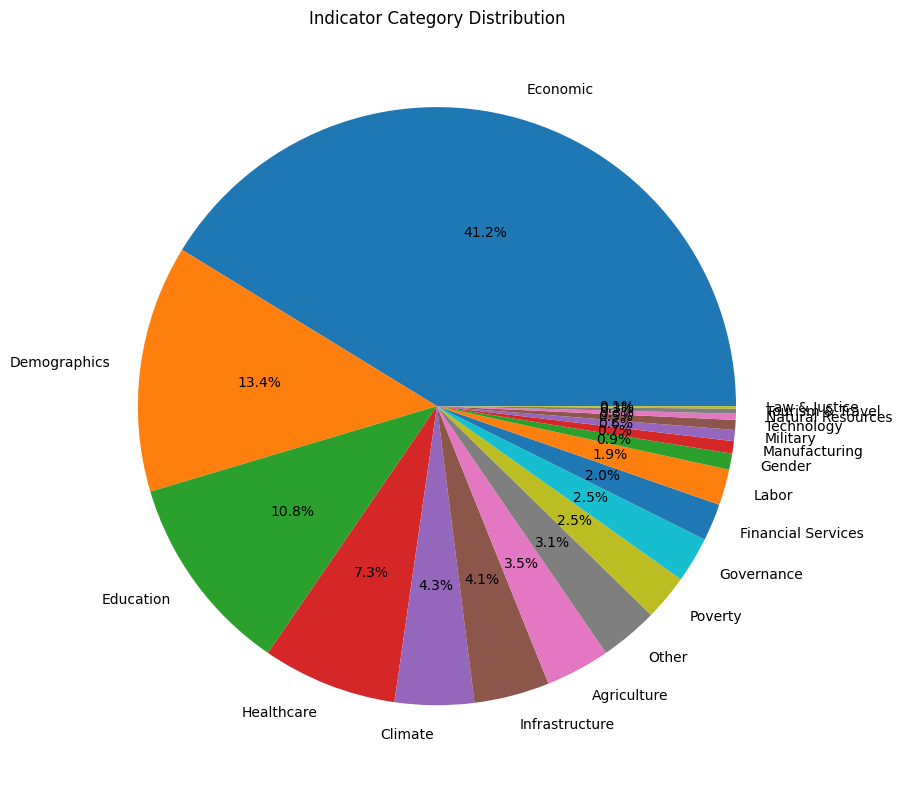

In [9]:
# Create a pie chart for category distribution
plt.figure(figsize=(12, 8))
category_counts.plot(kind='pie', autopct='%1.1f%%', title='Indicator Category Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [10]:
# Create a priority-based categorization function to handle crossover
def categorize_with_priority(indicator_text):
    """Categorize indicators with priority rules to handle crossover."""
    indicator_text = indicator_text.lower()
    matching_categories = []
    
    # Find all matching categories
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in indicator_text:
                matching_categories.append(category)
                break
    
    # If no matches, return 'Other'
    if not matching_categories:
        return 'Other'
    
    # If only one match, return that category
    if len(matching_categories) == 1:
        return matching_categories[0]
    
    # Priority rules for handling crossover
    # 1. Domain-specific indicators with clear categories
    if 'manufacturing' in indicator_text and 'Manufacturing' in matching_categories:
        return 'Manufacturing'
        
    if ('bribery' in indicator_text or 'theft' in indicator_text or 'vandalism' in indicator_text) and 'Law & Justice' in matching_categories:
        return 'Law & Justice'
        
    if ('fisheries' in indicator_text or 'fish production' in indicator_text) and 'Agriculture' in matching_categories:
        return 'Agriculture'
        
    if ('financial institution' in indicator_text or 'atm' in indicator_text or 'banking' in indicator_text) and 'Financial Services' in matching_categories:
        return 'Financial Services'
        
    if ('tourism' in indicator_text or 'tourist' in indicator_text or 'visitor arrival' in indicator_text) and 'Tourism & Travel' in matching_categories:
        return 'Tourism & Travel'
    
    if ('species' in indicator_text or 'threatened' in indicator_text or 'biodiversity' in indicator_text) and 'Natural Resources' in matching_categories:
        return 'Natural Resources'
    
    if ('interest payment' in indicator_text) and 'Financial Services' in matching_categories:
        return 'Financial Services'
    
    if ('tetanus' in indicator_text) and 'Healthcare' in matching_categories:
        return 'Healthcare'
    
    if ('bop' in indicator_text) and 'Financial Services' in matching_categories:
        return 'Financial Services'
    
    if ('official aid' in indicator_text or 'development assistance' in indicator_text or 'oda' in indicator_text) and 'Economic' in matching_categories:
        return 'Economic'
    
    if ('subsidies' in indicator_text) and 'Financial Services' in matching_categories:
        return 'Financial Services'
    
    if ('overweight' in indicator_text or 'wasting' in indicator_text) and 'Healthcare' in matching_categories:
        return 'Healthcare'
    
    if ('migrant stock' in indicator_text) and 'Demographics' in matching_categories:
        return 'Demographics'
    
    if ('regulatory' in indicator_text) and 'Governance' in matching_categories:
        return 'Governance'
    
    if ('inventories' in indicator_text) and 'Economic' in matching_categories:
        return 'Economic'
    
    if ('services, value added' in indicator_text) and 'Financial Services' in matching_categories:
        return 'Financial Services'
    
    if ('liabilities' in indicator_text) and 'Economic' in matching_categories:
        return 'Economic'
    
    if ('ifc' in indicator_text) and 'Economic' in matching_categories:
        return 'Economic'
    
    # 2. Domain-specific priority rules for existing categories
    if 'Climate' in matching_categories and any(term in indicator_text for term in ['emission', 'co2', 'carbon', 'greenhouse']):
        return 'Climate'
    
    if 'Healthcare' in matching_categories and any(term in indicator_text for term in ['mortality', 'disease', 'health', 'diarrhea']):
        return 'Healthcare'
    
    if 'Poverty' in matching_categories and any(term in indicator_text for term in ['poverty', 'poor', 'gini']):
        return 'Poverty'
    
    if 'Education' in matching_categories and any(term in indicator_text for term in ['school', 'education', 'literacy']):
        return 'Education'
    
    if 'Gender' in matching_categories and any(term in indicator_text for term in ['female', 'women', 'gender']):
        return 'Gender'
    
    # 3. Category hierarchies for specific combinations
    if 'Manufacturing' in matching_categories and 'Economic' in matching_categories:
        if 'industrial design' in indicator_text:
            return 'Manufacturing'
        else:
            return 'Economic'
    
    if 'Economic' in matching_categories and 'Financial Services' in matching_categories:
        if any(term in indicator_text for term in ['bank', 'atm', 'deposit', 'borrower', 'subsidy', 'subsidies', 'services, value added']):
            return 'Financial Services'
        else:
            return 'Economic'
    
    # 4. Default to the first category in the list if no priority rules matched
    return matching_categories[0]

# Apply the new categorization function
df['Enhanced_Category'] = df['Indicator Name'].apply(categorize_with_priority)

# Compare the results
enhanced_counts = df['Enhanced_Category'].value_counts()
print("Enhanced category distribution:")
print(enhanced_counts)

# Analyze improvement
other_count_original = category_counts.get('Other', 0)
other_count_enhanced = enhanced_counts.get('Other', 0)
improvement = other_count_original - other_count_enhanced
print(f"\nReduction in 'Other' category: {improvement} indicators")
print(f"Percentage improvement: {improvement/len(df)*100:.2f}%")

Enhanced category distribution:
Enhanced_Category
Economic              479
Education             169
Demographics          138
Healthcare            121
Gender                116
Financial Services     95
Climate                74
Infrastructure         58
Agriculture            48
Other                  47
Poverty                43
Governance             38
Labor                  18
Manufacturing          17
Tourism & Travel       10
Military                9
Natural Resources       6
Law & Justice           5
Technology              5
Name: count, dtype: int64

Reduction in 'Other' category: 0 indicators
Percentage improvement: 0.00%


In [11]:
# Analyze indicators that moved out of 'Other' category
moved_from_other = df[(df['Category'] == 'Other') & (df['Enhanced_Category'] != 'Other')]
if len(moved_from_other) > 0:
    print(f"Number of indicators moved from 'Other' to specific categories: {len(moved_from_other)}")
    print("\nSample of indicators moved from 'Other' to specific categories:")
    moved_sample = moved_from_other[['Indicator Name', 'Enhanced_Category']].head(15)
    display(moved_sample)

# Count by new category
if len(moved_from_other) > 0:
    new_categories_count = moved_from_other['Enhanced_Category'].value_counts()
    print("\nCount of former 'Other' indicators by new category:")
    print(new_categories_count)

In [12]:
# Save the enhanced categorization to the reference file
df.to_csv('output/reference/categorized_indicator_lookup.csv', index=False)